In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
def flip_second_half(l):
  new_l = []
  mid = int(len(l)/2)
  for i in range(mid):
    new_l.append(l[i])
  for i in range(mid, len(l)):
    new_l.append(np.flipud(l[i]))
  return np.array(new_l)

In [0]:
# Create new training and test labels, where 0 represents right side up and 1 represents upside down. We rely on the fact that we
# flipped the second half of both the training and test images.
train_labels = np.concatenate([np.zeros(train_mid, dtype=int), np.ones(train_mid, dtype=int)])
test_labels = np.concatenate([np.zeros(test_mid, dtype=int), np.ones(test_mid, dtype=int)])

train_images = flip_second_half(train_images)
test_images = flip_second_half(test_images)

In [0]:
# Scale the images to be between 0 and 1 instead of each channel from 0 to 255.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# Shuffle the data so it is not half right-side up and half upside-down. This is
# a repurposing of a method that is meant to split up an original data set into
# test and training. If has a side effect of shuffling the data.
from sklearn.model_selection import train_test_split

train_images, _, train_labels, _ = train_test_split(train_images , train_labels, test_size=0.0)
test_images, _, test_labels, _ = train_test_split(test_images , test_labels, test_size=0.0)


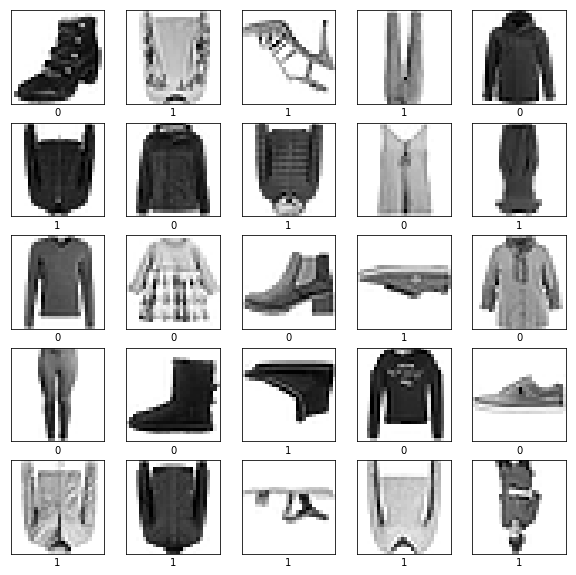

In [122]:
# Plot some images with their labels.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i + int(len(test_images)/2)], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i + int(len(test_images)/2)])
plt.show()

In [0]:
# Build a model. First we will try a simple NN that has just one hidden layer.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [125]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1354 - acc: 0.9477
Epoch 2/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0716 - acc: 0.9738
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0561 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0478 - acc: 0.9823
Epoch 5/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0412 - acc: 0.9850


In [126]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0559 - acc: 0.9807
Test accuracy: 0.9807


In [127]:
predictions = model.predict(test_images)
predictions.shape

(10000, 2)

In [128]:
np.argmax(predictions[0])

1

In [129]:
test_labels[0]

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  predicted_label
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

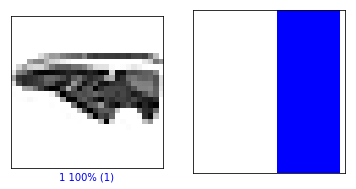

In [131]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

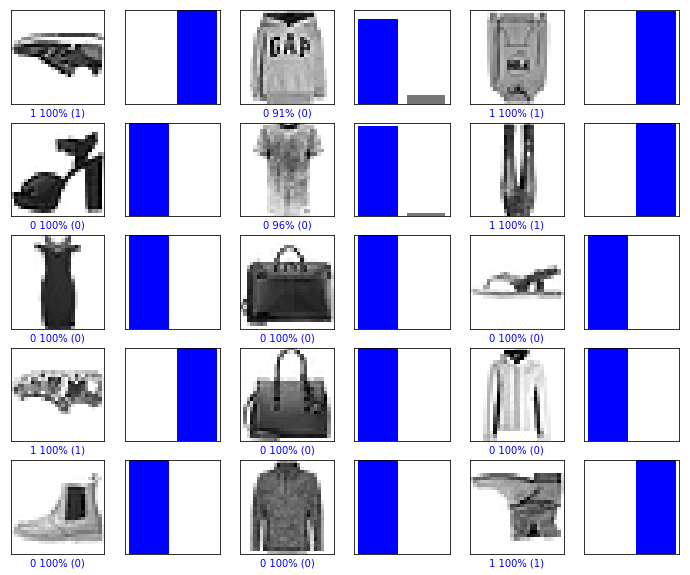

In [132]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()